# Import Library

In [54]:
import cv2
from ultralytics import YOLO
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import json
import math
from IPython.display import display, Image
import statistics
import random
import torch
from ultralytics import YOLO
from scipy.stats import mode
import os
import torch
from typing import Any
import shutil

# Detcting Object and Save Images in Folder

In [8]:


# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set inference settings for filtering cars, trucks, and buses
model.conf = 0.51  # NMS confidence threshold
model.iou = 0.55  # NMS IoU threshold
model.classes = [2, 3, 5, 7]  # Filter by class: 2 for cars, 6 for trucks, 7 for buses
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # Maximum number of detections per image

# Path to directory containing all images
image_dir = './dataset_astyx_hires2019/dataset_astyx_hires2019/camera_front/'

# Output directory for images and bounding box coordinates
output_dir = './dataset_astyx_hires2019/dataset_astyx_hires2019/output/'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get list of all image paths
all_image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg')]

# Start from the 136th image
start_index = 0

# Initialize counter for processed images
count = 0

# Process each selected image
for i in range(start_index, len(all_image_paths), 4):
    # Check if 100 images have been processed
    if count >= 100:
        break
    
    # Get the image path
    img_path = all_image_paths[i]
    
    # Inference
    results = model(img_path)
    
    # Save the image with detected bounding boxes
    output_image_path = os.path.join(output_dir, f"{count}.jpg")  # Output image path
    results.save(save_dir=output_dir)  # Save image directly to output directory
    
    # Filter detected objects for cars, trucks, and buses only
    df = results.pandas().xyxy[0]
    df_filtered = df[(df['name'] == 'car') | (df['name'] == 'motorcycle') | (df['name'] == 'bus') | (df['name'] == 'truck')]
    
    # Define output path for CSV
    output_bb_filename = f"{count}_filtered.csv"
    output_bb_path = os.path.join(output_dir, output_bb_filename)
    
    # Save DataFrame to CSV
    df_filtered.to_csv(output_bb_path, index=False)
    
    # Increment the counter
    count += 1


Using cache found in C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-11 Python-3.11.9 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output2
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output3
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output4
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output5
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output6
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output7
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output8
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output9
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output10
Saved 1 image to dataset_astyx_hires2019\dataset_astyx_hires2019\output11
Saved 1 image to datase

# Detected Image Saving Raw Image

In [3]:

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set inference settings for filtering cars, trucks, and buses
model.conf = 0.51  # NMS confidence threshold
model.iou = 0.55  # NMS IoU threshold
model.classes = [2, 3, 5, 7]  # Filter by class: 2 for cars, 6 for trucks, 7 for buses
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # Maximum number of detections per image

# Path to directory containing all images
image_dir = './dataset_astyx_hires2019/dataset_astyx_hires2019/camera_front/'

# Output directory for images
output_image_dir = './dataset_astyx_hires2019/dataset_astyx_hires2019/output_images/'

# Create output directory if it doesn't exist
os.makedirs(output_image_dir, exist_ok=True)

# Get list of all image paths
all_image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg')]

# Start from the 136th image
start_index = 0

# Initialize counter for processed images
count = 0

# Process each selected image
for i in range(start_index, len(all_image_paths), 4):
    # Check if 100 images have been processed
    if count >= 100:
        break
    
    # Get the image path
    img_path = all_image_paths[i]
    
    # Inference
    results = model(img_path)
    
    # Copy the selected image to output folder
    output_image_path = os.path.join(output_image_dir, os.path.basename(img_path))
    shutil.copy(img_path, output_image_path)
    
    # Increment the counter
    count += 1

Using cache found in C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-11 Python-3.11.9 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# Post Processing

In [9]:


# Define the path to the main folder containing subfolders with images
main_folder = ".\dataset_astyx_hires2019\dataset_astyx_hires2019\Output_images"

# Initialize an empty list to store paths of all images
all_images = []

# Iterate through each subfolder
for subfolder_name in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder_name)
    
    # Check if the item in the main folder is actually a directory
    if os.path.isdir(subfolder_path):
        # Iterate through each file in the subfolder
        for file_name in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file_name)
            # Check if the item is a file (not a directory)
            if os.path.isfile(file_path):
                all_images.append(file_path)

# Now all_images list contains paths of all images

# Next, let's create a separate folder to save all the images
output_folder = ".\dataset_astyx_hires2019\dataset_astyx_hires2019\Images"
os.makedirs(output_folder, exist_ok=True)

# Now let's save all the images to the separate folder
for image_path in all_images:
    # Extract the file name from the path
    _, file_name = os.path.split(image_path)
    # Construct the new path in the output folder
    new_path = os.path.join(output_folder, file_name)
    # Copy the image to the new path
    os.system(f"copy {image_path} {new_path}")  # For Windows
    # os.system(f"cp {image_path} {new_path}")  # For Linux/Mac (use this line instead if you're on Linux or Mac)


# Calibration Class

In [11]:
class calib_astyx():
    def __init__(self, file):
        # Initialize the calibration object by loading sensor calibration data from a JSON file.
        # Parameters:
        # - file: A string path to the JSON file containing calibration data for radar, lidar, and camera sensors.

        # Load calibration data from a JSON file
        with open(file) as json_file:
            data = json.load(json_file)
            
        # Calibration matrices for converting radar, lidar, and camera data to a reference coordinate system
        self.radar2ref = np.array(data["sensors"][0]["calib_data"]["T_to_ref_COS"])  # Radar to reference
        self.lidar2ref_cos = np.array(data["sensors"][1]["calib_data"]["T_to_ref_COS"])  # Lidar to reference (COS means Coordinate System)
        self.camera2ref = np.array(data["sensors"][2]["calib_data"]["T_to_ref_COS"])  # Camera to reference
        self.K = np.array(data["sensors"][2]["calib_data"]["K"])  # Intrinsic camera matrix
        
        # Compute inverse transformations for mapping from the reference coordinate system back to sensor-specific coordinate systems
        self.ref2radar = self.inv_trans(self.radar2ref)
        self.ref2lidar = self.inv_trans(self.lidar2ref_cos)
        self.ref2camera = self.inv_trans(self.camera2ref)

    @staticmethod
    def inv_trans(T):
        # Compute the inverse transformation matrix for a given sensor to reference coordinate transformation.
        # Parameters:
        # - T: A numpy array representing the transformation matrix from sensor to reference coordinates.
        # Returns:
        # - The inverse transformation matrix as a numpy array, which can be used to map points from the
        # reference coordinate system back to the sensor-specific coordinate system.

        rotation = np.linalg.inv(T[0:3, 0:3])  # Invert the rotation part
        translation = T[0:3, 3]
        translation = -1 * np.dot(rotation, translation.T)  # Invert the translation part
        translation = np.reshape(translation, (3, 1))
        Q = np.hstack((rotation, translation))  # Reassemble the inverted transformation matrix

        return Q


    def lidar2ref(self, points):
        # Convert lidar points from the lidar coordinate system to the reference coordinate system.
        n = points.shape[0]
        
        points_hom = np.hstack((points, np.ones((n,1))))  # Convert points to homogeneous coordinates
        points_ref = np.dot(points_hom, np.transpose(self.lidar2ref_cos))  # Transform points to reference coordinate system
        
        return points_ref[:,0:3]  # Return the transformed points, discarding the homogeneous coordinate
    
    def radar2ref(self, points):
        #Convert radar points from the radar coordinate system to the reference coordinate system.
        n = points.shape[0]
        points_hom = np.hstack((points, np.ones((n, 1))))  # Convert points to homogeneous coordinates
        points_ref = np.dot(points_hom, np.transpose(self.radar2ref))  # Transform points to reference coordinate system
        return points_ref[:, 0:3]  # Return the transformed points, discarding the homogeneous coordinate


    def ref2Camera(self, points, img_size):
        # Project points from the reference coordinate system onto the camera image plane.
        # Parameters:
        # - points: A numpy array of points in the reference coordinate system.
        # - img_size: A tuple representing the size of the camera image (width, height).
        # Returns:
        # - A tuple containing a numpy array of the projected points on the camera image plane and a mask
        # array indicating which points are within the image frame.

        obj_image = np.dot(self.ref2camera[0:3, 0:3], points.T)  # Apply rotation
        T = self.ref2camera[0:3, 3]
        obj_image = obj_image + T[:, np.newaxis]  # Apply translation
        obj_image = np.dot(self.K, obj_image)  # Apply intrinsic camera matrix
        obj_image = obj_image / obj_image[2]  # Normalize by the third row to project onto image plane
        obj_image = np.delete(obj_image, 2, 0)  # Remove the third row
        
        # Create a mask to filter out points that are outside the image frame or behind the camera
        mask = (obj_image[0,:] <= img_size[0]) & \
               (obj_image[1,:] <= img_size[1]) & \
               (obj_image[0,:] >= 0) & (obj_image[1,:] >= 0) & \
               (points[:,0] >= 0)
        return obj_image, mask  # Return the projected points and the mask


# Object Class Function

In [12]:
class Object3d(object):
    def __init__(self, obj):
        # Extract basic attributes
        self.type = obj["classname"]
        self.occlusion = obj["occlusion"] 
        self.quat = np.array(obj["orientation_quat"])
        self.rotationmatrix = self.get_rotationmatrix()
        
        # Extract 3D bounding box information
        self.h = obj["dimension3d"][2]  # box height
        self.w = obj["dimension3d"][1]  # box width
        self.l = obj["dimension3d"][0]  # box length (in meters)
        self.t = (obj["center3d"][0], obj["center3d"][1], obj["center3d"][2])
        
        self.distance = np.sqrt(np.sum(np.square(self.t)))
        
        # Calculate bounding box corners and object's angle
        self.bbox = self.get_bbox()
        self.angle = self.get_angle()[2]
        if self.angle >= 0:
            self.angle = self.angle * 180 / np.pi
        else:
            self.angle = self.angle * 180 / np.pi + 360

    def get_angle(self):
        w, x, y, z = self.quat
        return (math.atan2(2*(w*x+y*z), 1-2*(x*x+y*y)),
                math.asin(2*(w*y-z*x)),
                math.atan2(2*(w*z+x*y), 1-2*(y*y+z*z)))

    def get_bbox(self):
        center = np.array(self.t)
        dimension = np.array([self.l, self.w, self.h])

        # Adjust dimensions for bounding box calculation
        w, l, h = dimension[0] + 0.1, dimension[1] + 0.1, dimension[2]

        # Define corner points in local object coordinates
        x_corners = [-w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2, w / 2]
        y_corners = [l / 2, -l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2, l / 2]
        z_corners = [h / 2, h / 2, h / 2, -h / 2, -h / 2, -h / 2, -h / 2, h / 2]

        # Apply rotation and translate to global coordinates
        R = self.rotationmatrix
        bbox = np.vstack([x_corners, y_corners, z_corners])
        bbox = np.dot(R, bbox)
        bbox = bbox + center[:, np.newaxis]
        bbox = np.transpose(bbox)

        return bbox
    
    def get_rotationmatrix(self):
        n = np.dot(self.quat, self.quat)
        if n < np.finfo(self.quat.dtype).eps:
            return np.identity(4)  # Return identity matrix if quaternion is near zero
        
        q = self.quat * np.sqrt(2.0 / n)
        q = np.outer(q, q)
        rot_matrix = np.array(
            [[1.0 - q[2, 2] - q[3, 3], q[1, 2] + q[3, 0], q[1, 3] - q[2, 0]],
             [q[1, 2] - q[3, 0], 1.0 - q[1, 1] - q[3, 3], q[2, 3] + q[1, 0]],
             [q[1, 3] + q[2, 0], q[2, 3] - q[1, 0], 1.0 - q[1, 1] - q[2, 2]]],
            dtype=q.dtype)
        rot_matrix = np.transpose(rot_matrix)
        return rot_matrix

class calib_astyx():
    def __init__(self, file):
        # Load calibration data from a JSON file
        with open(file) as json_file:
            data = json.load(json_file)
            
        # Calibration matrices for converting radar, lidar, and camera data to a reference coordinate system
        self.radar2ref_cos = np.array(data["sensors"][0]["calib_data"]["T_to_ref_COS"])  # Radar to reference
        self.lidar2ref_cos = np.array(data["sensors"][1]["calib_data"]["T_to_ref_COS"])  # Lidar to reference (COS means Coordinate System)
        self.camera2ref = np.array(data["sensors"][2]["calib_data"]["T_to_ref_COS"])  # Camera to reference
        self.K = np.array(data["sensors"][2]["calib_data"]["K"])  # Intrinsic camera matrix
        
        # Compute inverse transformations for mapping from the reference coordinate system back to sensor-specific coordinate systems
        self.ref2radar = self.inv_trans(self.radar2ref_cos)
        self.ref2lidar = self.inv_trans(self.lidar2ref_cos)
        self.ref2camera = self.inv_trans(self.camera2ref)

    @staticmethod
    def inv_trans(T):
        rotation = np.linalg.inv(T[0:3, 0:3])  # Invert the rotation part
        translation = T[0:3, 3]
        translation = -1 * np.dot(rotation, translation.T)  # Invert the translation part
        translation = np.reshape(translation, (3, 1))
        Q = np.hstack((rotation, translation))  # Reassemble the inverted transformation matrix

        return Q
    
    def lidar2ref(self, points):
        n = points.shape[0]
        
        points_hom = np.hstack((points, np.ones((n,1))))  # Convert points to homogeneous coordinates
        points_ref = np.dot(points_hom, np.transpose(self.lidar2ref_cos))  # Transform points to reference coordinate system
        
        return points_ref[:,0:3]  # Return the transformed points, discarding the homogeneous coordinate
    
    def radar2ref(self, points):
        # Convert radar points from the radar coordinate system to the reference coordinate system.

        n = points.shape[0]
        
        points_hom = np.hstack((points, np.ones((n,1))))  # Convert points to homogeneous coordinates
        points_ref = np.dot(points_hom, np.transpose(self.radar2ref_cos))  # Transform points to reference coordinate system
        
        return points_ref[:,0:3]  # Return the transformed points, discarding the homogeneous coordinate

    def ref2Camera(self, points, img_size):
        
        n = points.shape[0]
        
        # Convert points to homogeneous coordinates
        points_hom = np.hstack((points, np.ones((n,1))))
        
        # Transform points to camera coordinate system
        points_camera = np.dot(points_hom, np.transpose(self.ref2camera))
        
        # Project points onto camera image plane
        projected_points = np.dot(points_camera, np.transpose(self.K))
        projected_points = projected_points[:, 0:2] / projected_points[:, 2][:, None]
        
        # Create mask to filter out points outside the image boundaries
        mask = (projected_points[:, 0] >= 0) & (projected_points[:, 0] < img_size[0]) & \
               (projected_points[:, 1] >= 0) & (projected_points[:, 1] < img_size[1])
        
        return projected_points, mask


# Lidar Points on Images

In [7]:


# Load calibration data
calib_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/calibration/"
lidar_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/lidar_vlp16/"
image_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/output_images"

# Create output folder if it doesn't exist
output_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/lidar_on_image"
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the image folder
for image_name in os.listdir(image_folder):
    # Check if the file is an image file
    if image_name.endswith(".jpg"):
        # Extract the image number from the image file name
        image_number = image_name.split(".")[0]
        
        # Define the corresponding lidar and calibration file names
        lidar_file = os.path.join(lidar_folder, f"{image_number}.txt")
        calib_file = os.path.join(calib_folder, f"{image_number}.json")

        # Check if lidar and calibration files exist for the current image
        if os.path.exists(lidar_file) and os.path.exists(calib_file):
            # Load calibration data
            calib = calib_astyx(calib_file)

            # Load lidar data from text file
            lidar = np.loadtxt(lidar_file, skiprows=1)
            lidar_points = lidar[:, :3]  # Selecting only the first three points

            # Load camera image using OpenCV
            img = cv2.imread(os.path.join(image_folder, image_name))

            # Get the height and width of the image
            img_height, img_width = img.shape[:2]

            # Project lidar points onto camera image
            lidar_points_ref = calib.lidar2ref(lidar_points)
            projected_points, mask = calib.ref2Camera(lidar_points_ref, (img_width, img_height))

            # Draw lidar points on the image
            for point in projected_points:
                x, y = point.astype(int)
                cv2.circle(img, (x, y),3, (0, 255, 0), -1)

            # Save the output image with lidar points
            output_path = os.path.join(output_folder, f"{image_number}.jpg")
            cv2.imwrite(output_path, img)


# Example Image

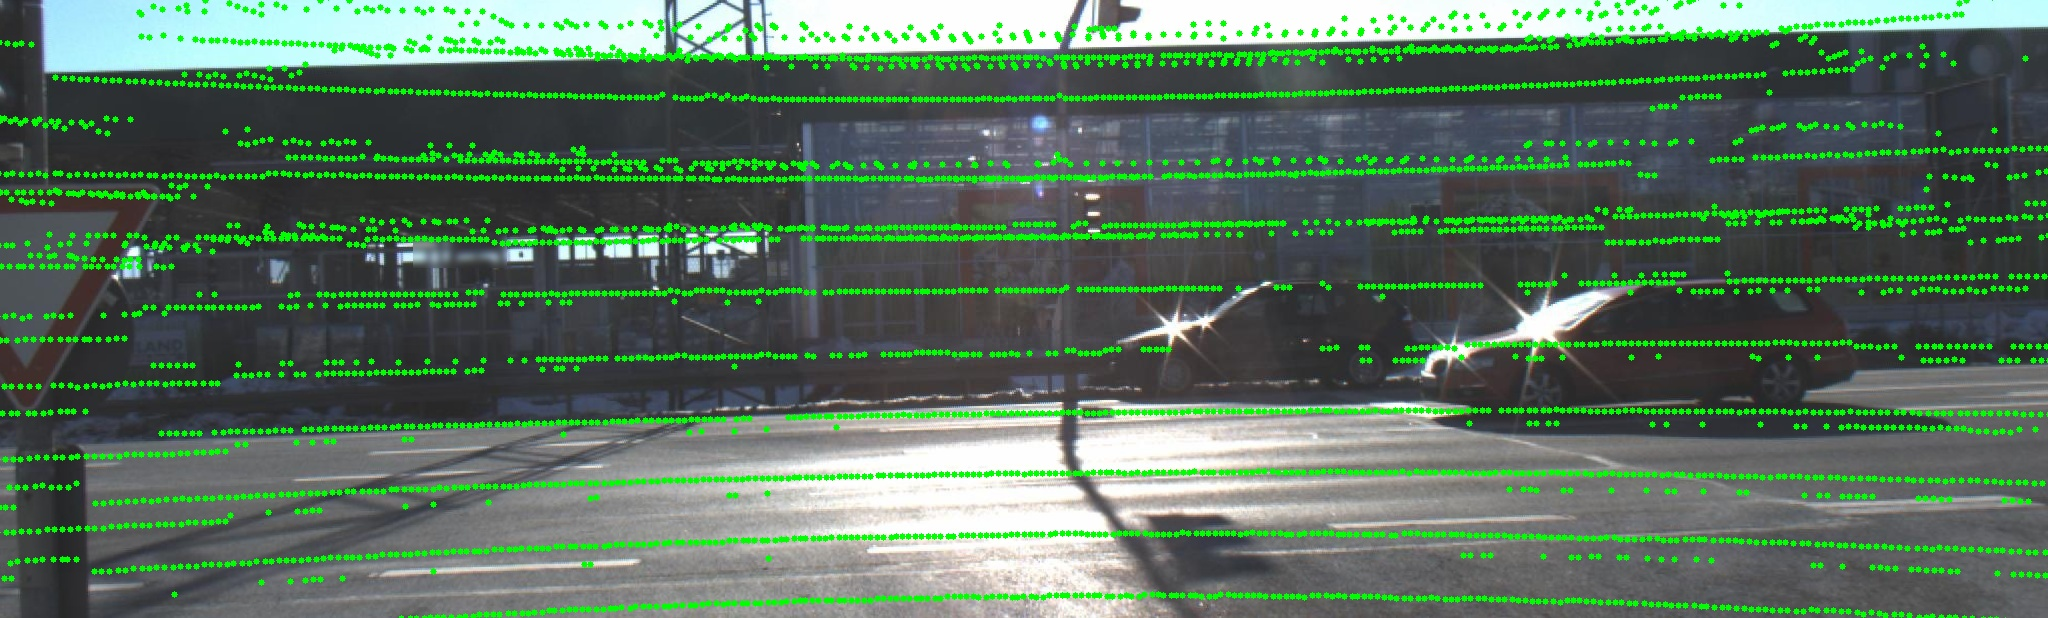

In [14]:
# Convert projected points to integers for pixel coordinates
projected_points_int = projected_points.astype(int)
# Display the image
display(Image(data=cv2.imencode('.jpg', img)[1]))

In [16]:

# Define the directory to save the processed images
output_dir = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/processed_images/"
images_dir = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/output_images/"
bbox_dir = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/BB_100images/"
# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over each image in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(images_dir, filename)
        img_lidar = cv2.imread(image_path)
        
        # Read bounding box coordinates
        bbox_data_path = os.path.join(bbox_dir, filename.replace(".jpg", ".csv"))
        bbox_data = pd.read_csv(bbox_data_path)
        BB_Coor = bbox_data[['xmin', 'ymin', 'xmax', 'ymax']].values
        
        # Assuming you already have lidar projected points stored in lidar_points
        lidar_points = projected_points_int  # Replace this with your lidar projected points
        Lidar_Fil = lidar_points.copy()

        # Compare bounding box coordinates and lidar points
        Fused_BB_Li = []
        for point in Lidar_Fil:
            x, y = point[:2]
            for xmin, ymin, xmax, ymax in BB_Coor:
                if xmin <= x <= xmax and ymin <= y <= ymax:
                    Fused_BB_Li.append(point)
                    break

        # Store the filtered lidar points in Fused_BB_Li
        Fused_BB_Li = np.array(Fused_BB_Li)

        # Draw lidar points inside bounding box on copied image
        for point in Fused_BB_Li:
            cv2.circle(img_lidar, (point[0], point[1]), radius=1, color=(0, 255, 0), thickness=3)

        # Define the path to save the processed image
        output_image_path = os.path.join(output_dir, filename)

        # Save the image with filtered lidar points inside the bounding box
        cv2.imwrite(output_image_path, img_lidar)

print("Processed images saved in:", output_dir)
        

Processed images saved in: ./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/processed_images/


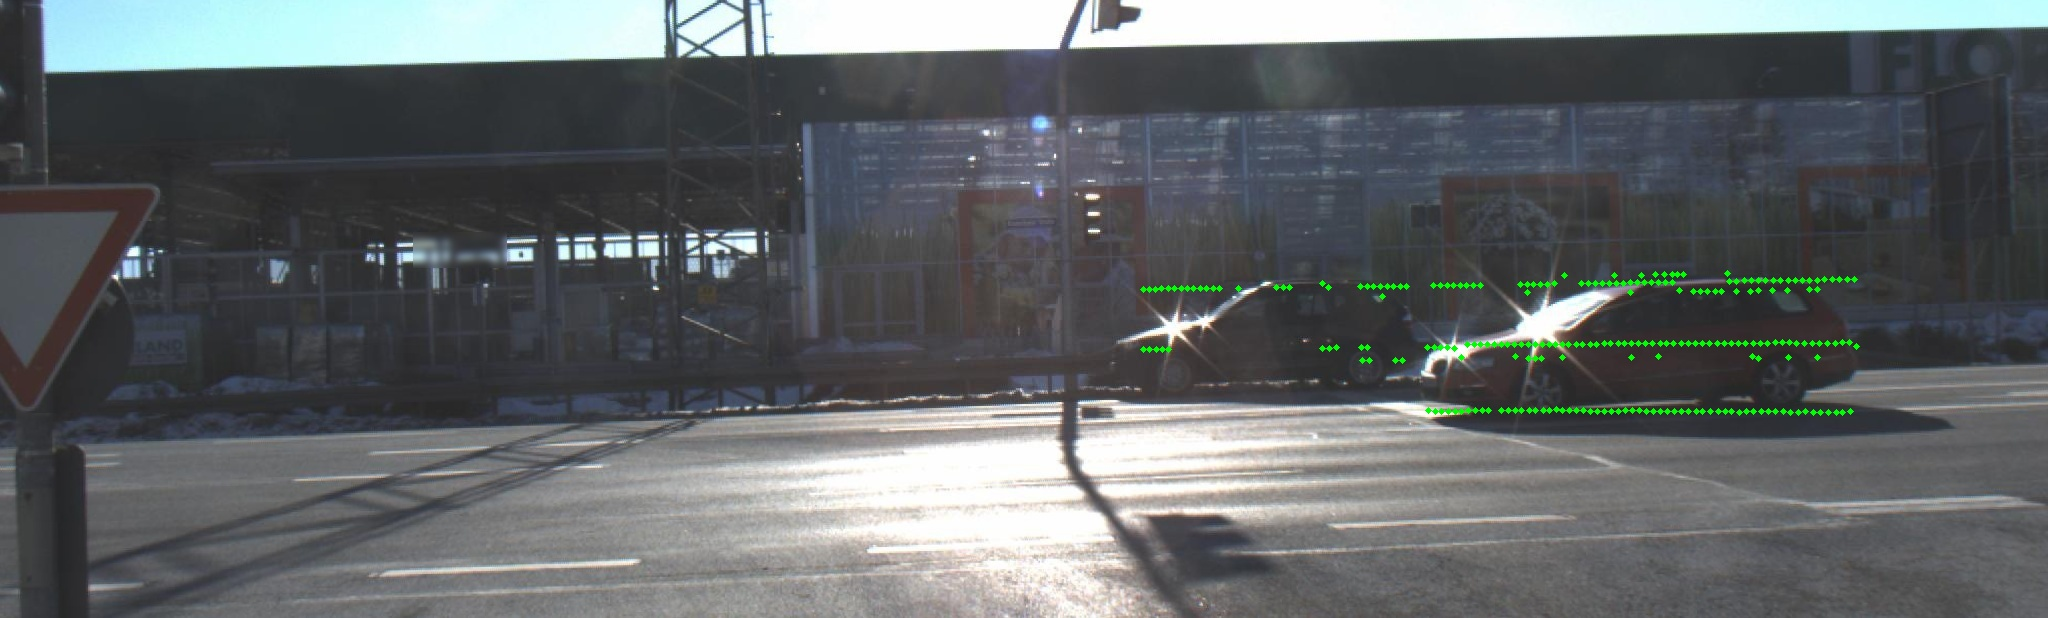

In [17]:

# Display the image
display(Image(data=cv2.imencode('.jpg', img_lidar)[1]))

# Radar Points on Images

In [56]:
# Load calibration data
calib_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/calibration/"
radar_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/radar_6455/"
image_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/output_images"

# Create output folder if it doesn't exist
output_folder = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/radar_on_image"
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the image folder
for image_name in os.listdir(image_folder):
    # Check if the file is an image file
    if image_name.endswith(".jpg"):
        # Extract the image number from the image file name
        image_number = image_name.split(".")[0]
        
        # Define the corresponding lidar and calibration file names
        radar_file = os.path.join(radar_folder, f"{image_number}.txt")
        calib_file = os.path.join(calib_folder, f"{image_number}.json")

        # Check if lidar and calibration files exist for the current image
        if os.path.exists(radar_file) and os.path.exists(calib_file):
            # Load calibration data
            calib = calib_astyx(calib_file)

            # Load lidar data from text file
            radar = np.loadtxt(radar_file, skiprows=2)
            radar_points = radar[:, :3]  # Selecting only the first three points

            # Load camera image using OpenCV
            img_radar = cv2.imread(os.path.join(image_folder, image_name))

            # Get the height and width of the image
            img_height, img_width = img.shape[:2]

            # Project lidar points onto camera image
            radar_points_ref = calib.radar2ref(radar_points)
            projected_points_ra, mask = calib.ref2Camera(radar_points_ref, (img_width, img_height))

            # Draw lidar points on the image
            for point in projected_points_ra:
                x, y = point.astype(int)
                cv2.circle(img_radar, (x, y),3, (0, 255, 0), -1)

            # Save the output image with lidar points
            output_path = os.path.join(output_folder, f"{image_number}.jpg")
            cv2.imwrite(output_path, img_radar)

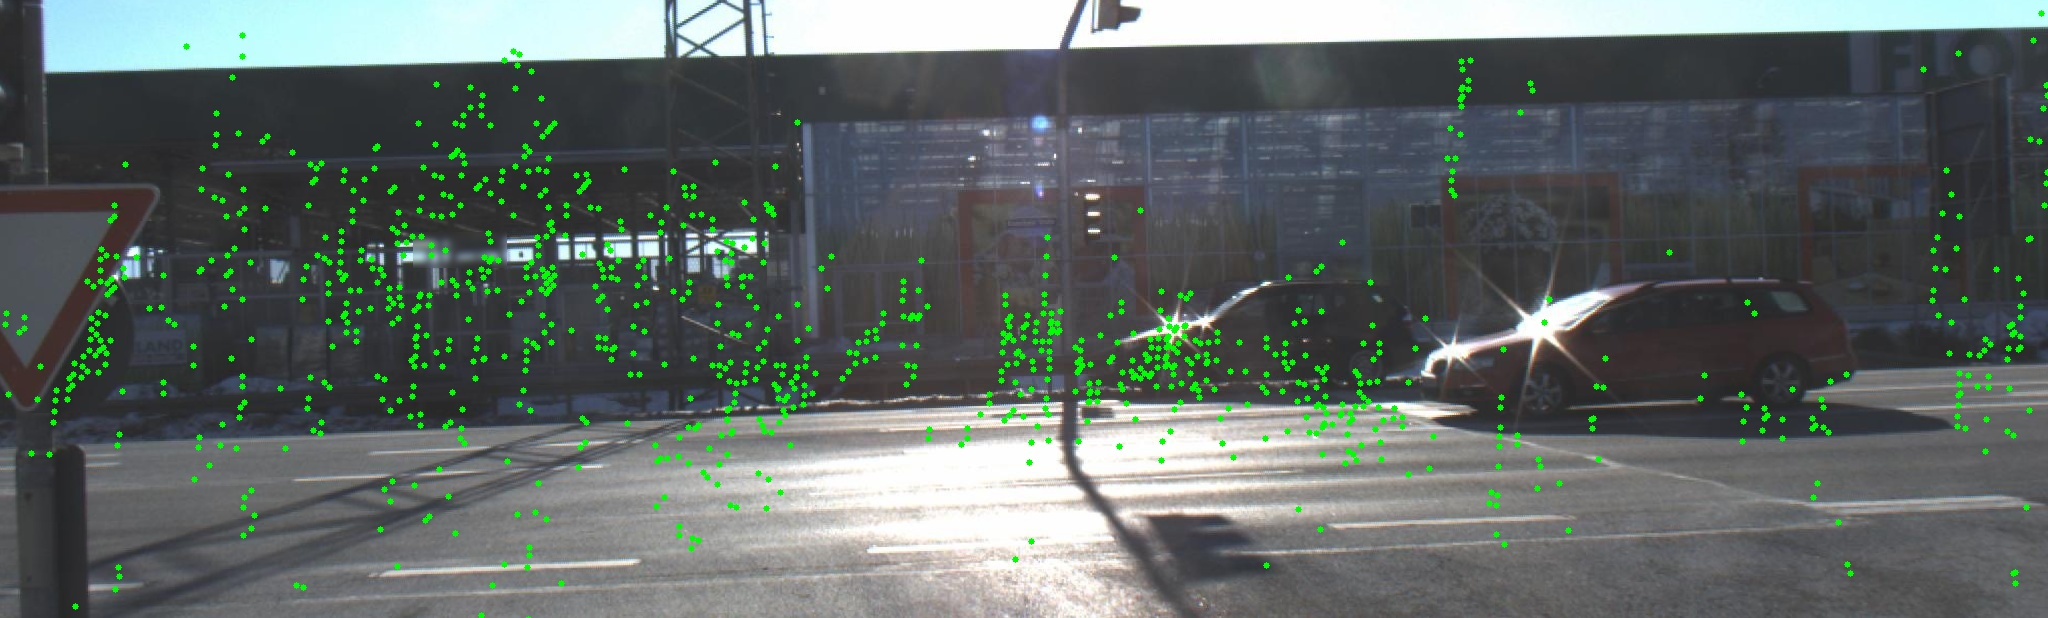

In [58]:
# Convert projected points to integers for pixel coordinates
projected_points_int_ra = projected_points_ra.astype(int)
# Display the image
display(Image(data=cv2.imencode('.jpg', img_radar)[1]))

In [60]:

# Define the directory to save the processed images
output_dir = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/processed_images_ra/"
images_dir = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/output_images/"
bbox_dir = "./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/BB_100images/"
# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over each image in the directory
for filename in os.listdir(images_dir):
    if filename.endswith(".jpg"):
        # Read the image
        image_path = os.path.join(images_dir, filename)
        img_ra = cv2.imread(image_path)
        
        # Read bounding box coordinates
        bbox_data_path = os.path.join(bbox_dir, filename.replace(".jpg", ".csv"))
        bbox_data = pd.read_csv(bbox_data_path)
        BB_Coor = bbox_data[['xmin', 'ymin', 'xmax', 'ymax']].values
        
        # Assuming you already have lidar projected points stored in lidar_points
        radar_points = projected_points_int_ra  # Replace this with your lidar projected points
        radar_Fil = radar_points.copy()

        # Compare bounding box coordinates and lidar points
        Fused_BB_Ra = []
        for point in radar_Fil:
            x, y = point[:2]
            for xmin, ymin, xmax, ymax in BB_Coor:
                if xmin <= x <= xmax and ymin <= y <= ymax:
                    Fused_BB_Ra.append(point)
                    break

        # Store the filtered lidar points in Fused_BB_Li
        Fused_BB_Ra = np.array(Fused_BB_Ra)

        # Draw lidar points inside bounding box on copied image
        for point in Fused_BB_Ra:
            cv2.circle(img_ra, (point[0], point[1]), radius=1, color=(0, 255, 0), thickness=3)

        # Define the path to save the processed image
        output_image_path = os.path.join(output_dir, filename)

        # Save the image with filtered lidar points inside the bounding box
        cv2.imwrite(output_image_path, img_ra)

print("Processed images saved in:", output_dir)
        

Processed images saved in: ./dataset_astyx_hires2019/dataset_astyx_hires2019/Final_Output/processed_images_ra/


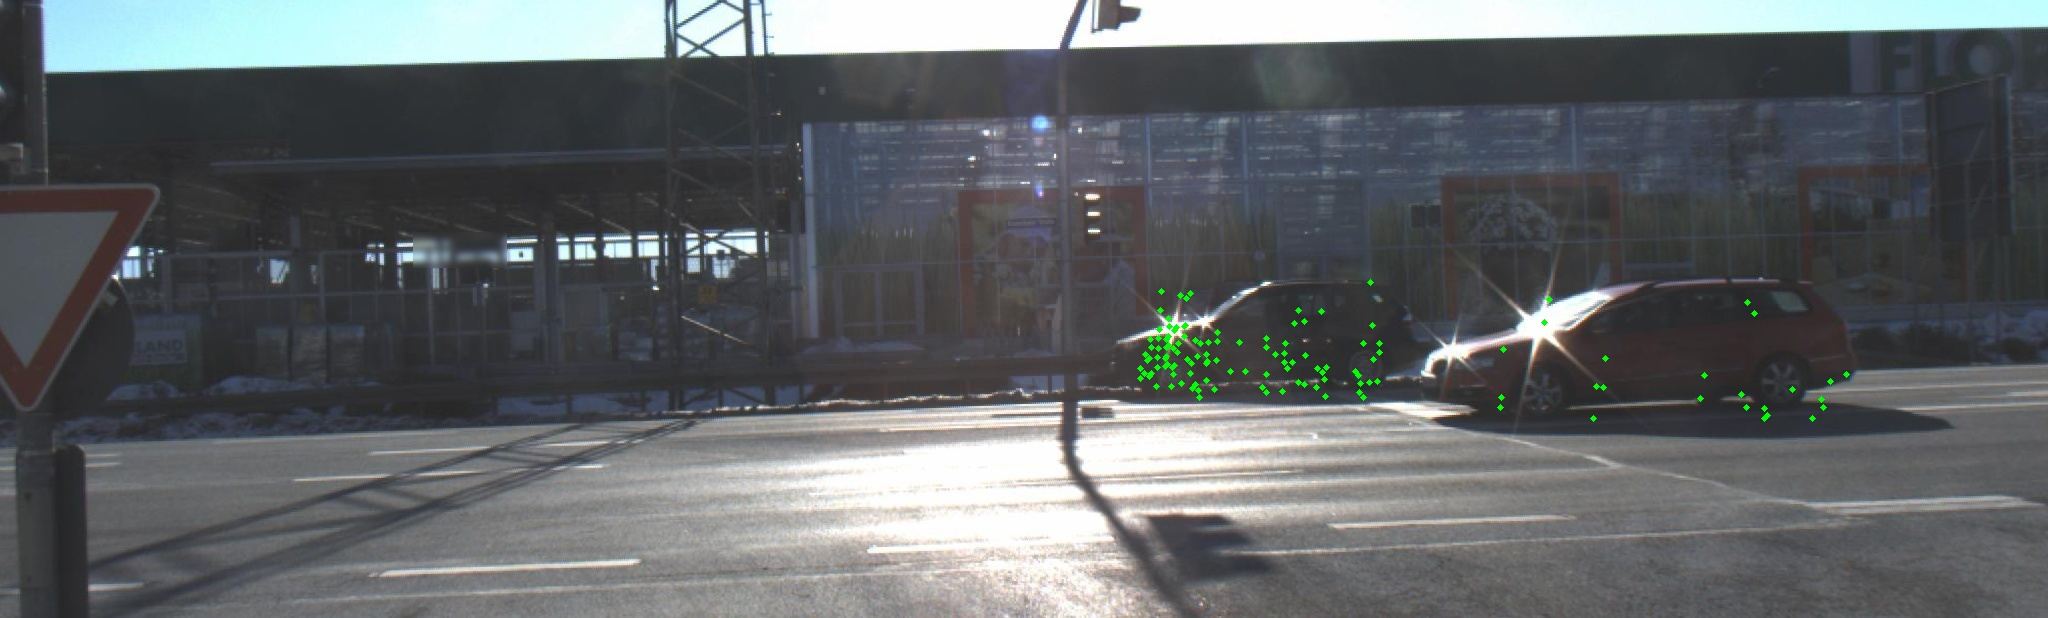

In [61]:
display(Image(data=cv2.imencode('.jpg', img_ra)[1]))